#Drug Usage Final Project

RESEARCH QUESTIONS

•	Is marijuana a gateway drug? Does it correlate highly with other illicit substance use?

•	How old are people when they first use marijuana as opposed to other drugs?

•	Are there significant correlations between illicit drug use and other factors, apart from marijuana use?


Data = National Survey on Drug Use and Health 2012

#Import Data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore', lineno=590)
warnings.filterwarnings('ignore', lineno=403)

In [2]:
df = pd.read_csv('34933-0001-Data.tsv', sep='\t', index_col=0, error_bad_lines=False)

In [3]:
df.head()

,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
CASEID,,,,,,,,,,,,,,,,,,,,,
1,50886467,2,4,4,991,9991,91,91,91,91,...,1,1,99,9,9,2,2,1275.597449,30054,2
2,13766883,2,99,99,991,9991,91,91,91,91,...,1,1,1,1,1,2,2,5191.071173,30031,1
3,17772877,2,99,99,991,9991,91,91,91,91,...,1,1,1,1,1,3,3,419.742011,30056,2
4,45622817,1,99,99,13,9999,99,2,93,93,...,1,1,2,1,1,2,2,1449.303889,30054,1
5,17239390,1,99,99,11,9999,99,4,93,93,...,1,1,1,1,1,1,1,15344.293577,30012,2


In [4]:
len(df) # number of rows (respondents)

55268

##Make Dataframe of all Questions Related to Drug Use

In [5]:
# Making a dataframe of all questions about drug use, 0 = Never Used, 1 = Ever Used
df_ever_used = pd.concat([df['CIGFLAG'], df['CGRFLAG'], df['PIPFLAG'],df['SMKFLAG'],df['CHWFLAG'], df['SNFFLAG'], df['TOBFLAG'],df['ALCFLAG'],df['MRJFLAG'],df['COCFLAG'],df['CRKFLAG'],df['HERFLAG'],df['HALFLAG'],df['LSDFLAG'],df['PCPFLAG'],df['ECSFLAG'],df['INHFLAG'],df['ANLFLAG'],df['OXYFLAG'],df['TRQFLAG'],df['STMFLAG'],df['CPNSTMFG'],df['MTHFLAG'],df['CPNMTHFG'],df['SEDFLAG'],df['PSYFLAG2'],df['CPNPSYFG'],df['SUMFLAG'],df['MJOFLAG'],df['IEMFLAG'],df['CDUFLAG'], df['AGE2']], axis =1)

In [6]:
# Sum total of people who have tried each drug/drug family
#df_ever_used[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()

In [7]:
df_ever_used_youth = df_ever_used[df_ever_used['AGE2'] <= 6]
len(df_ever_used_youth)

17399

In [8]:
# Sum total of people age 12-17 who have tried each drug/drug family
df_ever_used_youth = df_ever_used_youth[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()

In [9]:
df_ever_used_adult = df_ever_used[df_ever_used['AGE2'] > 6]
len(df_ever_used_adult)

37869

In [10]:
# Sum total of people age 18 and up who have tried each drug/drug family
df_ever_used_adult = df_ever_used_adult[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()

In [11]:
# Add Column to calculate total number of drugs tried
df_ever_sum = df_ever_used.drop('AGE2', 1)
df_ever_used_sum = df_ever_sum.drop('TOBFLAG', 1)
df_ever_used_sum['Total Tried'] = df_ever_used_sum.sum(axis=1)

##Make DataFrame of all Questions About Age of First Use

In [12]:
# Making a dataset of all questions about "age of first use"
df_age_first_use = pd.concat([df['CIGTRY'],df['SNUFTRY'],df['CHEWTRY'],df['CIGARTRY'],df['ALCTRY'],df['MJAGE'],df['COCAGE'],df['CRKAGE'],df['HERAGE'],df['LSDAGE'],df['PCPAGE'],df['ECSAGE'],df['HALLAGE'],df['INHAGE'],df['OXYCAGE'],df['ANALAGE'],df['TRANAGE'],df['STIMAGE'],df['SEDAGE']], axis=1)

df_age_first_use_1 = df_age_first_use.replace(['991','998','981', '985', '994', '997'], np.nan)

In [13]:
# Average age of first use of each drug/drug family

df_avg_age = df_age_first_use_1[['CIGTRY','SNUFTRY','CHEWTRY','CIGARTRY','ALCTRY','MJAGE','COCAGE','CRKAGE','HERAGE','LSDAGE','PCPAGE','ECSAGE','HALLAGE','INHAGE','OXYCAGE','ANALAGE','TRANAGE','STIMAGE','SEDAGE']].mean()
df_avg_age.to_frame()
df_avg_age = df_avg_age.reset_index()
df_avg_age.rename(columns={'index': 'Drugs', 0: 'Average Age'}, inplace=True)

##Make DataFrame of Drug Use by Age

In [14]:
df_age_and_drugs = pd.DataFrame()

In [15]:
df_ever_used_2 = df_ever_used[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_age_and_drugs['Youth'] = df_ever_used_youth.to_frame()[0]
df_age_and_drugs['Adults'] = df_ever_used_adult.to_frame()[0]

In [16]:
df_age_and_drugs['Youth'] = df_age_and_drugs['Youth']/17399
df_age_and_drugs['Adults'] = df_age_and_drugs['Adults']/37869
df_age_and_drugs['All'] = df_ever_used_2/55268

In [17]:
df_age_and_drugs.index.name = 'Drugs'
#df_age_and_drugs

##Make DataFrame of Drug Use by Race

In [18]:
df_ever_used['NEWRACE2'] = df['NEWRACE2']

In [20]:
df_race_and_drugs = pd.DataFrame()

df_ever_used_white = df_ever_used[df_ever_used['NEWRACE2'] == 1]
df_ever_used_black = df_ever_used[df_ever_used['NEWRACE2'] == 2]
df_ever_used_nativeam = df_ever_used[df_ever_used['NEWRACE2'] == 3]
df_ever_used_pacisl = df_ever_used[df_ever_used['NEWRACE2'] == 4]
df_ever_used_asian = df_ever_used[df_ever_used['NEWRACE2'] == 5]
df_ever_used_morethanone = df_ever_used[df_ever_used['NEWRACE2'] == 6]
df_ever_used_hispanic = df_ever_used[df_ever_used['NEWRACE2'] == 7]

df_ever_used_white = df_ever_used_white[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_ever_used_black = df_ever_used_black[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_ever_used_nativeam = df_ever_used_nativeam[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_ever_used_pacisl = df_ever_used_pacisl[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_ever_used_asian = df_ever_used_asian[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_ever_used_morethanone = df_ever_used_morethanone[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()
df_ever_used_hispanic = df_ever_used_hispanic[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','TOBFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','SUMFLAG','MJOFLAG','IEMFLAG','CDUFLAG']].sum()

df_race_and_drugs['White'] = df_ever_used_white.to_frame()[0]
df_race_and_drugs['Black'] = df_ever_used_black.to_frame()[0]
df_race_and_drugs['Native American'] = df_ever_used_nativeam.to_frame()[0]
df_race_and_drugs['Pacific Islander'] = df_ever_used_pacisl.to_frame()[0]
df_race_and_drugs['Asian'] = df_ever_used_asian.to_frame()[0]
df_race_and_drugs['More Than One'] = df_ever_used_morethanone.to_frame()[0]
df_race_and_drugs['Hispanic'] = df_ever_used_hispanic.to_frame()[0]

df_race_and_drugs['White'] = df_race_and_drugs['White']/33339
df_race_and_drugs['Black'] = df_race_and_drugs['Black']/7153
df_race_and_drugs['Native American'] = df_race_and_drugs['Native American']/770
df_race_and_drugs['Pacific Islander'] = df_race_and_drugs['Pacific Islander']/316
df_race_and_drugs['Asian'] = df_race_and_drugs['Asian']/2167
df_race_and_drugs['More Than One'] = df_race_and_drugs['More Than One']/1947
df_race_and_drugs['Hispanic'] = df_race_and_drugs['Hispanic']/9576

##Make DataFrame of Freq Drug Use and Arrests Over Past Yr

In [21]:
df_past_yr_freq = pd.DataFrame()
df_past_yr_freq['Alc'] = df['IRALCFY']
df_past_yr_freq['MJ'] = df['IRMJFY']
df_past_yr_freq['Coke'] = df['IRCOCFY']
df_past_yr_freq['Crack'] = df['IRCRKFY']
df_past_yr_freq['Hallucinogen'] = df['IRHALFY']
df_past_yr_freq['Pain Reliever'] = df['IRANLFY']

df_past_yr_freq['Booked Freq'] = df['NOBOOKY2']

df_past_yr_freq = df_past_yr_freq.replace(['985','991','993','994','997','998','999'], np.nan)

#Initial Analyses 

First step is to look at the average ages of respondents when they first tried each type of drug.

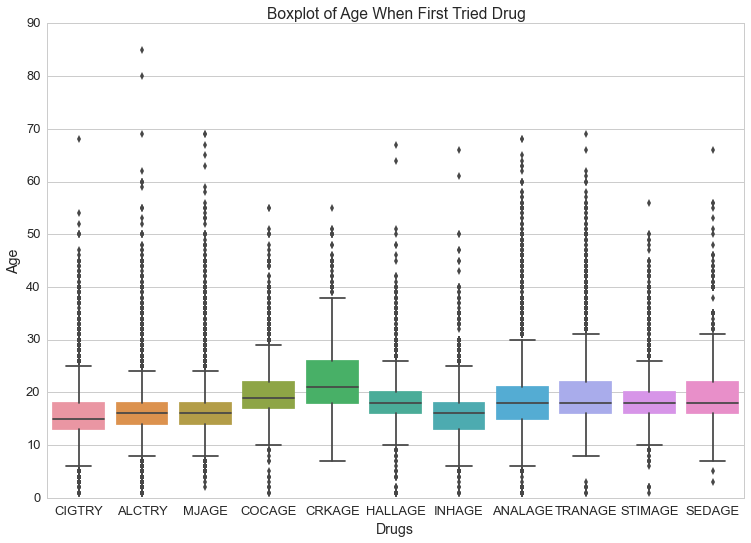

In [62]:
df_ages2 = df_age_first_use_1[['CIGTRY','ALCTRY','MJAGE','COCAGE','CRKAGE','HALLAGE','INHAGE','ANALAGE','TRANAGE','STIMAGE', 'SEDAGE']]
sns.set_context(rc={"figure.figsize": (12.5, 8.5)})
sns.boxplot(data=df_ages2
           );
plt.title('Boxplot of Age When First Tried Drug')
plt.xlabel('Drugs')
plt.ylabel('Age')

Boxplot shows that cigarettes had the youngest average age at 15.5, alcohol the second youngest at 16.3, and marijuana the third youngest at 16.5. The illicit drugs apart from marijuana all had median ages between 18 and 23.

Now to look at the percentage of people who have tried each type of drug/drug family.

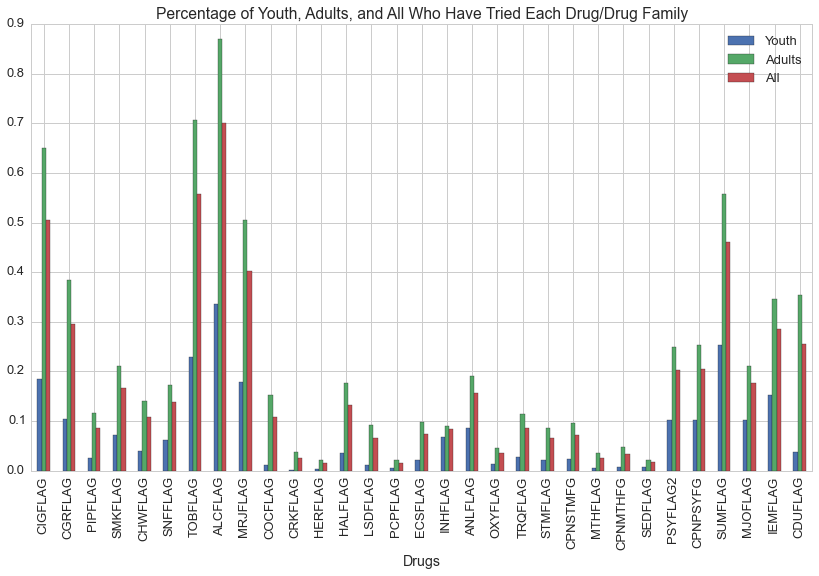

In [24]:
df_age_and_drugs.plot(kind='bar', figsize=(14,8));
plt.title('Percentage of Youth, Adults, and All Who Have Tried Each Drug/Drug Family')

The three most tried drugs for each age, in order of most to least, were alcohol, tobacco, and marijuana. 

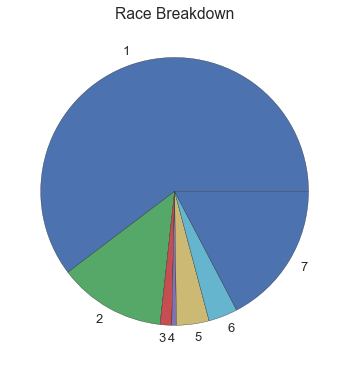

In [25]:
plt.figure(figsize=(6,6));
df.groupby('NEWRACE2').size().plot(kind='pie');
plt.title('Race Breakdown');
plt.ylabel('');

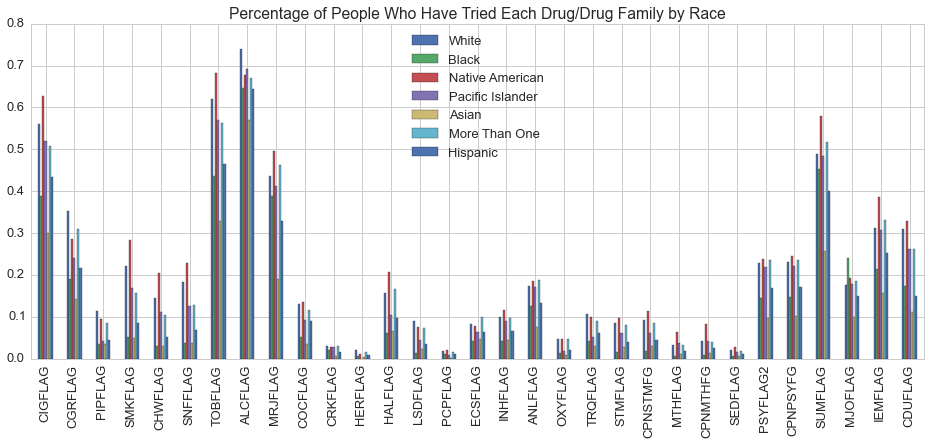

In [63]:
df_race = df_race_and_drugs[['White', 'Black', 'Native American', 'Pacific Islander', 'Asian','More Than One', 'Hispanic']]
df_race.plot(kind='bar', figsize=(16,6));
plt.title('Percentage of People Who Have Tried Each Drug/Drug Family by Race')

The three most tried drugs for each race, in order, were alcohol, tobacco, and marijuana. The same top three as in the age barplot.

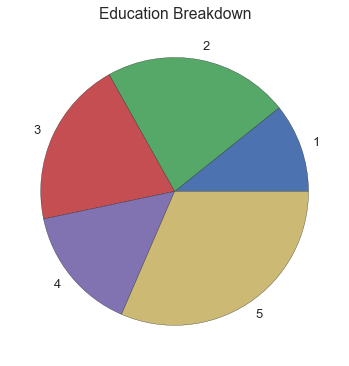

In [27]:
plt.figure(figsize=(6,6));
df.groupby('EDUCCAT2').size().plot(kind='pie');
plt.title('Education Breakdown');
plt.ylabel('');

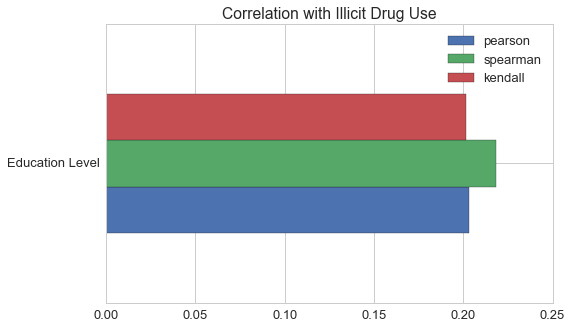

In [95]:
df_ever_used['Race'] = df['NEWRACE2']
df_ever_used['Education Level'] = df['EDUCCAT2'].replace(5,1)

# Show a bar plot of correlations with Illicit Drug Use
methods = ['pearson','spearman','kendall']
fields = ['Education Level']
cols = {}
for m in methods:
    col = [df_ever_used['SUMFLAG'].corr(df_ever_used[f], method=m)
           for f in fields]
    cols[m] = col
df_corrs_with_ed = pd.DataFrame(cols, columns=methods, 
                                          index=fields)

df_corrs_with_ed.plot(kind='barh',figsize=(8,5),
                                title='Correlation with Illicit Drug Use');

To examine illicit drug use (including marijuana) and education level I made a simple pearson, spearman, kendall, correlation bar plot and found that the correlations ranged from .20 to .22

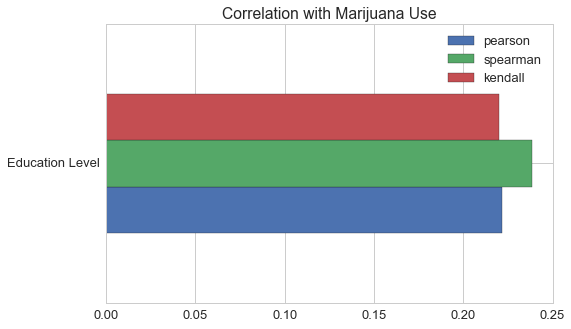

In [92]:
df_ever_used['Race'] = df['NEWRACE2']
df_ever_used['Education Level'] = df['EDUCCAT2'].replace(5,1)

# Show a bar plot of correlations with Illicit Drug Use
methods = ['pearson','spearman','kendall']
fields = ['Education Level']
cols = {}
for m in methods:
    col = [df_ever_used['MRJFLAG'].corr(df_ever_used[f], method=m)
           for f in fields]
    cols[m] = col
df_corrs_with_ed = pd.DataFrame(cols, columns=methods, 
                                          index=fields)

df_corrs_with_ed.plot(kind='barh',figsize=(8,5),
                                title='Correlation with Marijuana Use');

I made a second correlation bar plot of marijuana use and education level and found that the correlations were slightly higher, ranging from approximately .22 to .24 

#Examining Correlations of Drug Use with Other Drugs

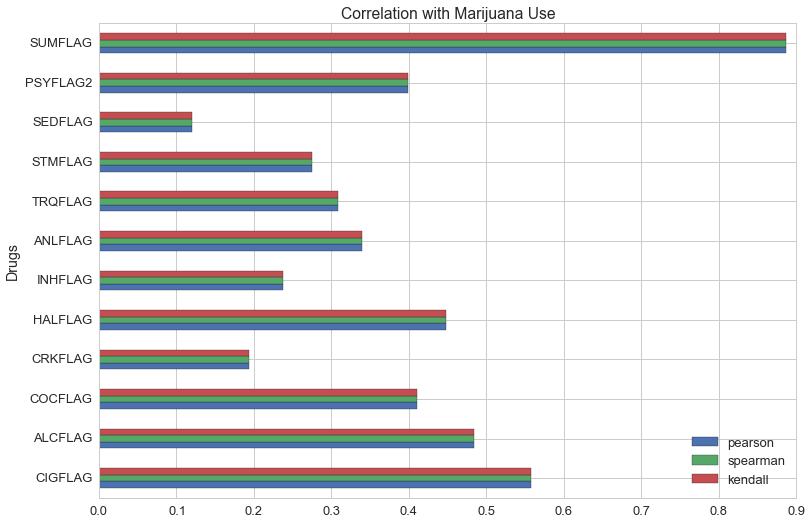

In [93]:
df_ever_used['Race'] = df['NEWRACE2']

# Show a bar plot of correlations with Marijuana
methods = ['pearson','spearman','kendall']
fields = ['CIGFLAG','ALCFLAG', 'COCFLAG','CRKFLAG','HALFLAG','INHFLAG','ANLFLAG','TRQFLAG','STMFLAG','SEDFLAG','PSYFLAG2','SUMFLAG']
cols = {}
for m in methods:
    col = [df_ever_used['MRJFLAG'].corr(df_ever_used[f], method=m)
           for f in fields]
    cols[m] = col
df_corrs_with_MJ = pd.DataFrame(cols, columns=methods, 
                                          index=fields)
df_corrs_with_MJ.plot(kind='barh',
                                title='Correlation with Marijuana Use');
plt.ylabel('Drugs')

To examine correlation between marijuana and other illicit substances I made a pearson, spearman, kendall correlation bar plot of marijuana and other drug use and found that of illicit drugs marijuana had the highest correlations with hallucinogens at .44, cocaine at .41, and psychotherapeutics at .39. 

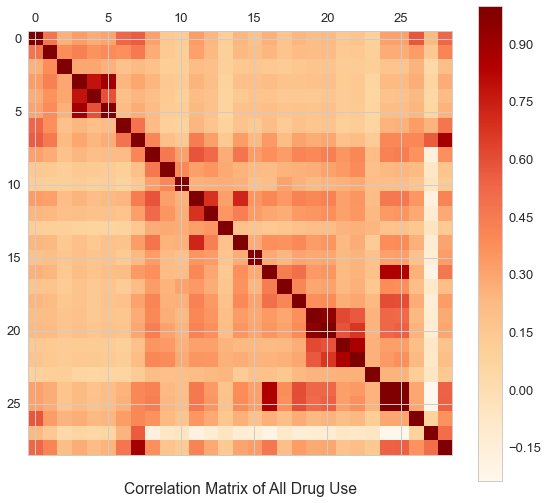

In [36]:
# Visualize the correlation matrix of all variables.
corr_matrix = df_ever_used[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','CDUFLAG', 'MJOFLAG','SUMFLAG']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, cmap=plt.cm.OrRd)
fig.colorbar(cax)

# tags = ['']+corr_matrix.columns.tolist()
# ax.set_xticklabels(tags)
# ax.set_yticklabels(tags)
plt.title('Correlation Matrix of All Drug Use', y=-0.1)

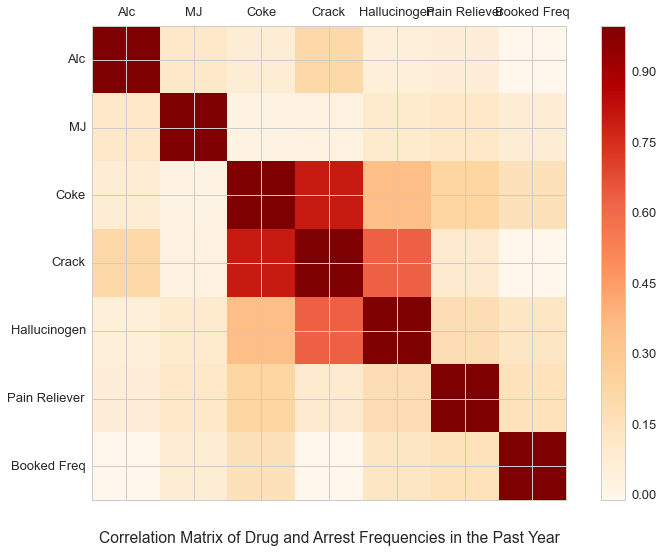

In [97]:
# Visualize the correlation matrix of drugs and Arrests.
corr_matrix = df_past_yr_freq[['Alc','MJ','Coke','Crack','Hallucinogen','Pain Reliever','Booked Freq']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, cmap=plt.cm.OrRd)
fig.colorbar(cax)

tags = ['']+corr_matrix.columns.tolist()
ax.set_xticklabels(tags)
ax.set_yticklabels(tags)
plt.title('Correlation Matrix of Drug and Arrest Frequencies in the Past Year', y=-0.1) # Measured in # of Days out of the year

To examine drug use frequency and arrest frequency over the past year, I made a correlation matrix. The correlations between drug use and arrest are all positive, but not very high. It looks like the highest is Booked and Cocaine somewhere around .15.

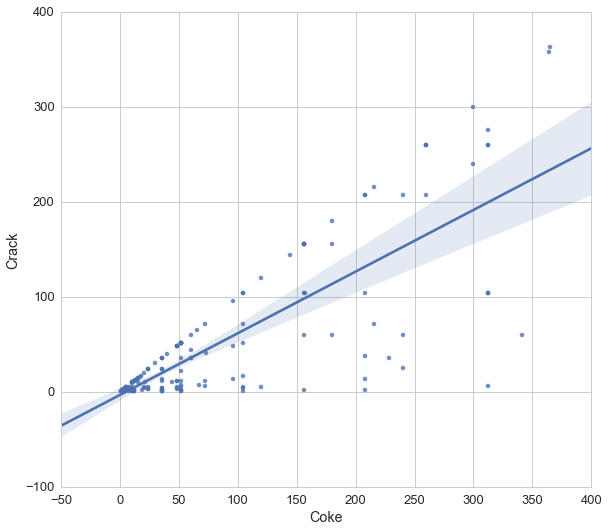

In [52]:
sns.regplot(x='Coke', y='Crack', data=df_past_yr_freq);

An interesting observation on the correlation matrix is the high correlation between Cocaine, Crack and Hallucinogens. This scatterplot and the SPLOM below show the linear regressions.

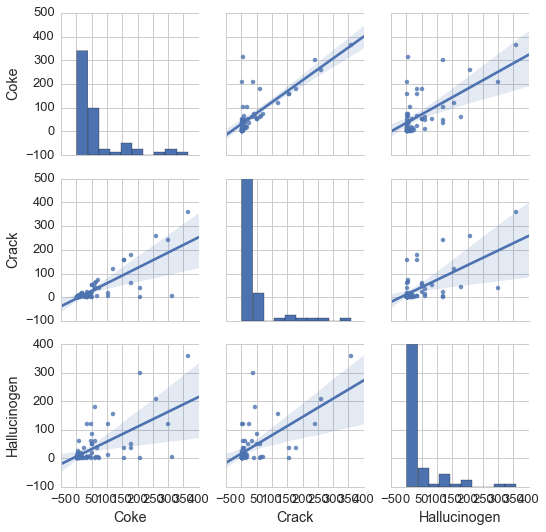

In [53]:
sns.pairplot(df_past_yr_freq[['Coke','Crack', 'Hallucinogen']].dropna(), kind="reg");

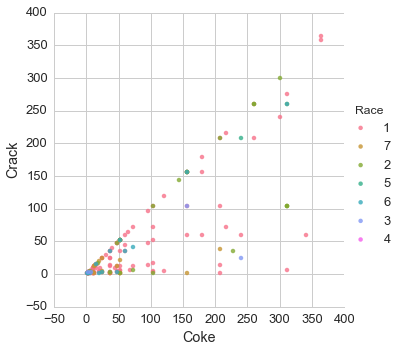

In [54]:
df_past_yr_freq['Race'] = df['NEWRACE2']
sns.lmplot(x='Coke', y='Crack', hue='Race', 
           fit_reg=False, data=df_past_yr_freq);

I tried to observe Cocaine and Crack use by race, but it is unclear yet if there are any real clusters.

#Bivariate Analysis

Normalizing drug use data

In [40]:
df_ever_used_2 = df_ever_used[['CIGFLAG','CGRFLAG','PIPFLAG','SMKFLAG','CHWFLAG','SNFFLAG','ALCFLAG','MRJFLAG','COCFLAG','CRKFLAG','HERFLAG','HALFLAG','LSDFLAG','PCPFLAG','ECSFLAG','INHFLAG','ANLFLAG','OXYFLAG','TRQFLAG','STMFLAG','CPNSTMFG','MTHFLAG','CPNMTHFG','SEDFLAG','PSYFLAG2','CPNPSYFG','CDUFLAG', 'SUMFLAG']]

In [41]:
import sklearn.preprocessing as skp


# df_ever_used_2[:] = skp.scale(df_ever_used_2, axis=0, with_mean=True, with_std=True, copy=True)
# df_ever_used_2.head()

df_ever_used_norm = df_ever_used_2.copy()
df_ever_used_norm.ix[:,:9] = skp.scale(
    df_ever_used_2.ix[:,:9].astype(np.float))
df_ever_used_norm.describe().ix[['mean','std']]

,CIGFLAG,CGRFLAG,PIPFLAG,SMKFLAG,CHWFLAG,SNFFLAG,ALCFLAG,MRJFLAG,COCFLAG,CRKFLAG,...,TRQFLAG,STMFLAG,CPNSTMFG,MTHFLAG,CPNMTHFG,SEDFLAG,PSYFLAG2,CPNPSYFG,CDUFLAG,SUMFLAG
mean,-7.790926e-17,8.853782e-16,3.574959e-16,1.131009e-15,1.509042e-15,-3.751544e-15,-8.583719e-16,5.034251e-17,1.179898e-15,0.025711,...,0.086216,0.065915,0.072338,0.026145,0.034287,0.016592,0.202685,0.205254,0.254867,0.461569
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.158273,...,0.280686,0.248136,0.259050,0.159569,0.181968,0.127738,0.402003,0.403891,0.435790,0.498525


Below (in the commented out code) is my attempt at making a dendrogram. Every time I tried to run the code my kernel would quit on me.

In [ ]:
# import scipy.spatial.distance as spd

# dist_ever_used = spd.squareform(spd.pdist(df_ever_used_norm, metric='euclidean'))
# dist_ever_used.shape

In [ ]:
#Use "single" linkage function
#Plot dendrogram
# Z_filt = sph.linkage(dist_ever_used, method='single')  # obtain the linkage matrix
# _ = sph.dendrogram(Z_filt)  # plot the linkage matrix as a dendrogram
# plt.xlabel('')
# plt.ylabel('')
# plt.suptitle('Dendrogram', 
#              fontweight='bold', fontsize=14);

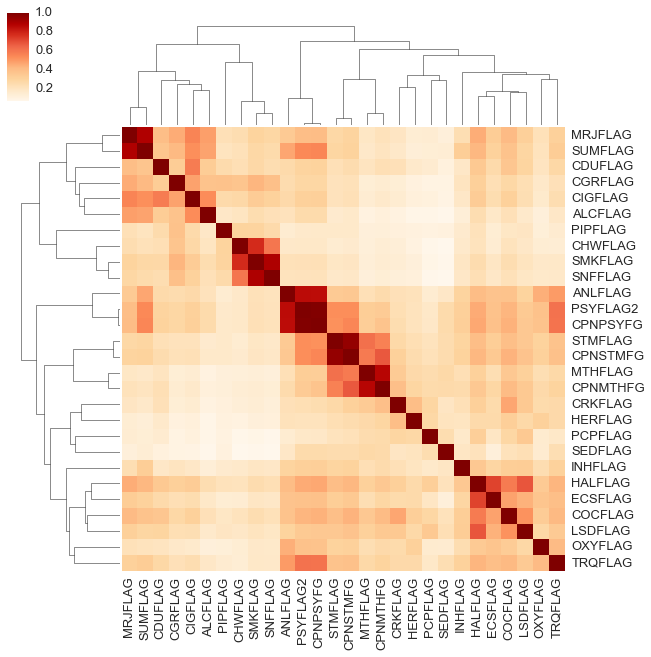

In [42]:
sns.clustermap(df_ever_used_norm.corr(), cmap=plt.cm.OrRd)

In [73]:
df_ever_used_norm['Race'] = df_ever_used['Race']

df_byrace = df_ever_used_norm.groupby('Race').mean()
df_byrace

,CIGFLAG,CGRFLAG,PIPFLAG,SMKFLAG,CHWFLAG,SNFFLAG,ALCFLAG,MRJFLAG,COCFLAG,CRKFLAG,...,TRQFLAG,STMFLAG,CPNSTMFG,MTHFLAG,CPNMTHFG,SEDFLAG,PSYFLAG2,CPNPSYFG,CDUFLAG,SUMFLAG
Race,,,,,,,,,,,,,,,,,,,,,
1,0.109876,0.122022,0.097347,0.144782,0.117183,0.135334,0.084960,0.067026,0.069398,0.030325,...,0.106542,0.085126,0.092894,0.032574,0.042653,0.020636,0.228471,0.231441,0.309487,0.487597
2,-0.231372,-0.230983,-0.186044,-0.311486,-0.249169,-0.291579,-0.118076,-0.030090,-0.183101,0.021250,...,0.041661,0.016636,0.018034,0.006291,0.007549,0.006151,0.145673,0.146372,0.173913,0.453796
3,0.245617,-0.023186,0.023971,0.315165,0.306534,0.261645,-0.054262,0.188085,0.084615,0.027273,...,0.098701,0.097403,0.112987,0.063636,0.081818,0.027273,0.237662,0.245455,0.328571,0.579221
4,0.029038,-0.122191,-0.162070,0.002214,0.007123,-0.030974,-0.018392,0.017998,-0.054459,0.028481,...,0.050633,0.060127,0.060127,0.037975,0.041139,0.015823,0.218354,0.221519,0.262658,0.484177
5,-0.408124,-0.339649,-0.185266,-0.315163,-0.253997,-0.287528,-0.289466,-0.435069,-0.238086,0.006461,...,0.029534,0.026765,0.030457,0.010614,0.014305,0.005538,0.097831,0.100600,0.111214,0.257499
6,0.008011,0.031608,-0.005328,-0.027474,-0.013762,-0.028669,-0.068163,0.120654,0.023615,0.029789,...,0.089882,0.080123,0.085259,0.031844,0.040062,0.019004,0.234720,0.235747,0.261428,0.517206
7,-0.139687,-0.175954,-0.153519,-0.219898,-0.186458,-0.202486,-0.123256,-0.152670,-0.060769,0.016291,...,0.060986,0.039474,0.045322,0.017544,0.024436,0.011487,0.169382,0.171784,0.150167,0.401420


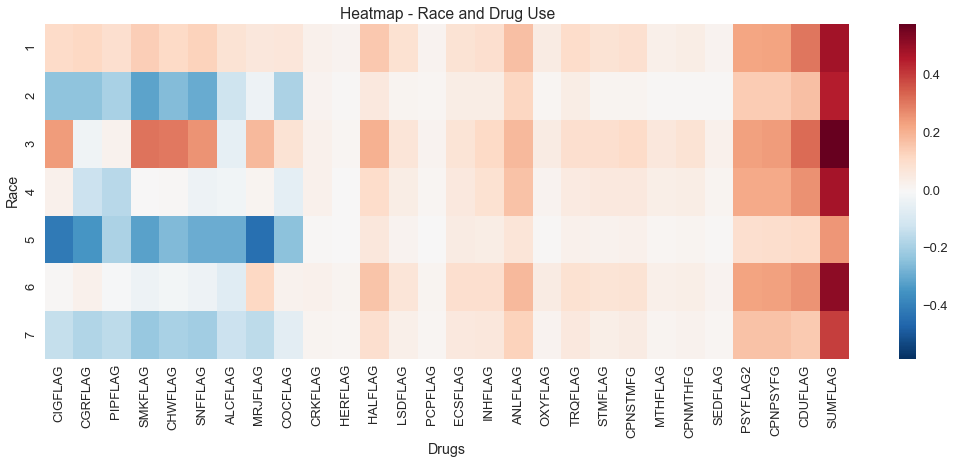

In [86]:
#Race: 1=White 2=Black 3=Native American 4=Native Hawaiian/Pacific Islander 5=Asian 6=More Than One 7=Hispanic

f,ax = plt.subplots(figsize=(18,6))
sns.heatmap(df_byrace, ax=ax)
plt.title('Heatmap - Race and Drug Use')
plt.xlabel('Drugs')

The findings in this heatmap do not seem to make much sense or relate to the correlations I had found earlier. I don't see any real patterns.

#PCA Analysis

In [65]:
import sklearn.decomposition as skd

pca_drugs = skd.PCA().fit(df_ever_used_norm.ix[:,:27])
pca_drugs.components_.shape

(27, 27)

In [66]:
pca_gr1 = pca_drugs.explained_variance_ > 1
pca_gr1

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

There are 27 Principle Components, 2 with explained variance greater than 1.

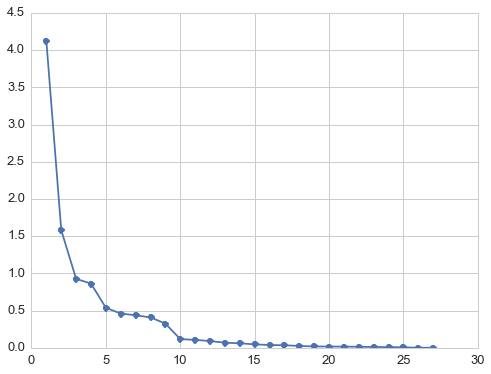

In [87]:
# Scree Plot
plt.figure(figsize=(8,6))
plt.plot(range(1,28), pca_drugs.explained_variance_, 'b-o')

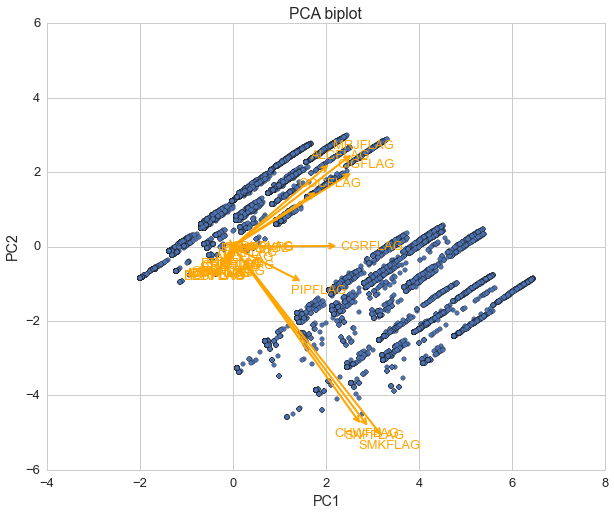

In [70]:
# Scatterplot of disaggregated data

X = pca_drugs.transform(df_ever_used_norm.ix[:,:27])
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-6, 6)

# Add variable unit vector projections

V = pca_drugs.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(df_ever_used_2.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

From the biplot, it is apparant that CGRFLAG (Cigar use) does not effect the data as it is along point 0.

SFFLAG, SMKFLAG, and CHWFLAG are also very positively correlated as they are all close to the same point on the plot. MRJFLAG, CIGFLAG, and ALCFLAG are fairly positively correlated.

The biplot even when enlarged is hard to read and the aggregated version would not run and also, similar to the dendrogram, shut down my kernel. It is difficult to tell the correlations of the other drugs on the plot.

In [98]:
# Scatterplot of aggregated data

# X = pca_drugs.transform(df_ever_used_norm.ix[:,:27])
# plt.figure(figsize=(10,8))
# plt.scatter(X[:,0], X[:,1], s=50)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA: Aggregated Data\nPerceptual Map')
# plt.xlim(-6,6)
# plt.ylim(-6,10)

# Add variable unit vector projections

# V = pca_drugs.transform(np.identity(X.shape[1]))
# for i, v in enumerate(V):
#     plt.annotate(df_ever_used_norm.columns[i], 
#                  xy=(0,0), xytext=v[:2]*10, 
#                  fontsize=12, color='orange',
#                  arrowprops=dict(
#                     arrowstyle='<-', linewidth=2, 
#                     color='orange'))

# Add data point annotation
# for i, s in enumerate(df['NEWRACE2']):
#     plt.annotate(s, xy=X[i,:2]+[0.1,-0.1], fontsize=15)